<a href="https://colab.research.google.com/github/parthb8539/Hirademy/blob/main/House_Price_Prediction_Codeclause.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
file_path = '/content/Housing.csv'
df = pd.read_csv(file_path)
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [5]:
# Check for missing values
print(df.isnull().sum())

# Convert categorical variables to numeric
df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

# Display the first few rows after transformation
print(df.head())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1

In [6]:
# Features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [8]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Coefficients and Intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Squared Error: 1771751116594.0352
Coefficients: [2.35848772e+02 7.85744924e+04 1.09711727e+06 4.06223164e+05
 3.66824192e+05 2.33146766e+05 3.93159779e+05 6.87881311e+05
 7.85550579e+05 2.25756514e+05 6.29901661e+05 2.10397118e+05]
Intercept: -127711.16739244293


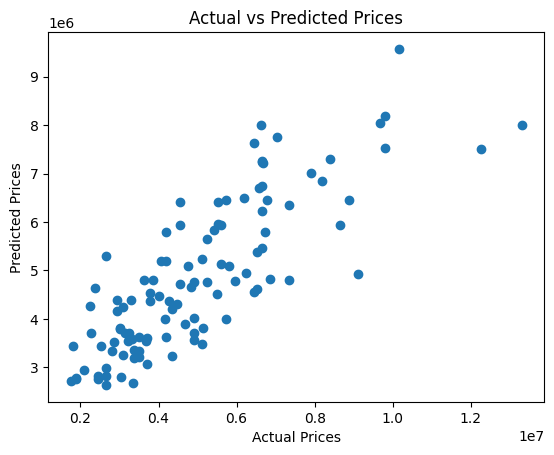

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
